In [1]:
from food_analyzer import fetch_products, clean_data, NutriModel
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("🚀 Démarrage de l'analyse...")

# 1. Récupération (Module downloader)
raw_data = fetch_products("biscuits", page_size=100)
print(f"📦 Produits bruts : {len(raw_data)}")

# 2. Nettoyage (Module cleaner)
df = clean_data(raw_data)
print(f"✨ Produits nettoyés et valides : {len(df)}")
display(df.head())

🚀 Démarrage de l'analyse...
📡 Tentative 1/3 pour : biscuits...
📦 Produits bruts : 100
✨ Produits nettoyés et valides : 96


,Nom,Marque,Nutriscore,Energie,Sucre,Gras,Saturés,Sel,Fibres,Protéines
86,Wheat Biscuits,By Sainsbury's,A,358.0,4.4,2.00,0.6,0.280,10.0,12.0
50,Wholegrain Wheat Bixies,Crownfield - Lidl,A,362.0,3.0,2.25,0.5,0.225,9.5,12.7
76,Oatibix,Weetabix,A,390.0,4.8,8.00,1.3,0.230,8.8,12.0
82,Cranberry saveur amande,Gerblé,A,48.0,1.8,1.50,0.2,0.020,0.6,0.8
12,Figue & son,Gerblé,B,450.0,16.0,19.00,1.7,0.190,13.0,9.3


In [3]:
model = NutriModel()
accuracy = model.train(df)

print(f"🎯 Précision du modèle : {accuracy:.2%}")

print("Test de prédiction")
test_produit = {
    'Energie': 450, 
    'Sucre': 30, 
    'Gras': 20, 
    'Saturés': 10, 
    'Sel': 0.5, 
    'Fibres': 2, 
    'Protéines': 6
}
note = model.predict(test_produit)
print(f"Un produit avec 30g de sucre et 10g de gras saturés aurait la note : {note}")

🎯 Précision du modèle : 100.00%
Test de prédiction
Un produit avec 30g de sucre et 10g de gras saturés aurait la note : E


/tmp/ipykernel_9951/4294266731.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


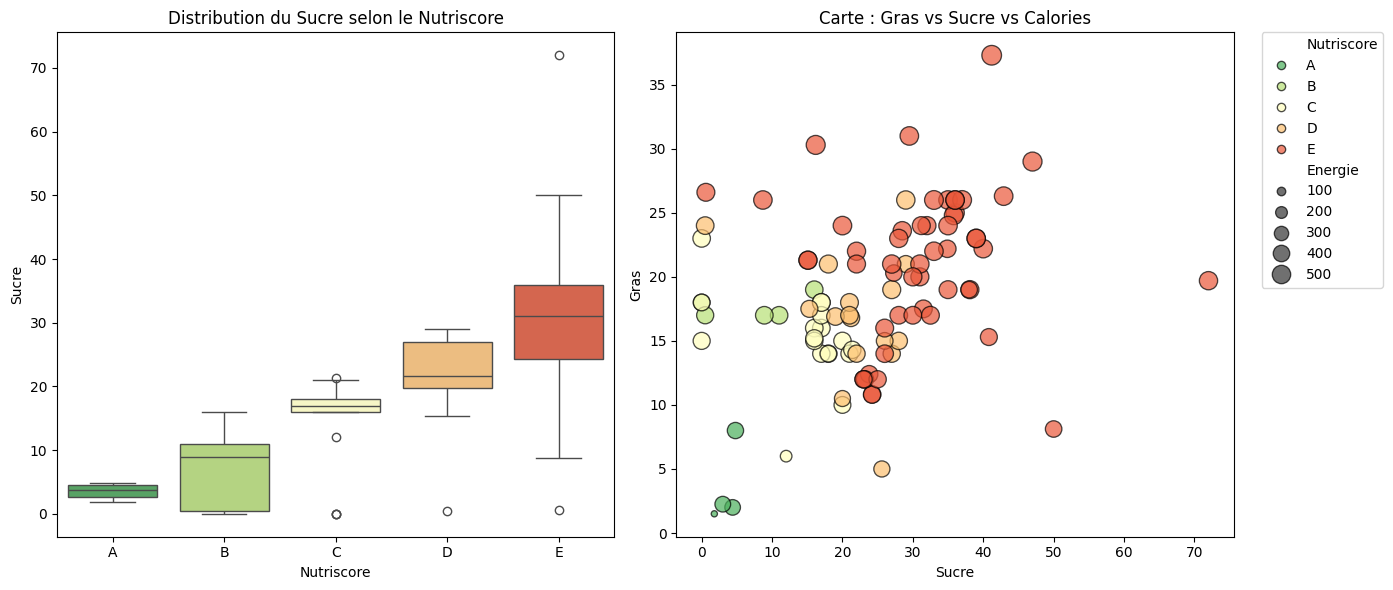

In [4]:
# Visualisation et Analyse

plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df, 
    x='Nutriscore', 
    y='Sucre', 
    palette="RdYlGn_r"
)
plt.title("Distribution du Sucre selon le Nutriscore")

# Analyse multivariée : Relation Gras / Sucre / Calories
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df, 
    x="Sucre", 
    y="Gras", 
    hue="Nutriscore",     # La couleur dépend du score
    size="Energie",# La taille du point dépend des calories
    sizes=(20, 200),      # Echelle de taille
    palette="RdYlGn_r",
    alpha=0.7,            # Transparence pour voir les points superposés
    edgecolor="black"
)
plt.title("Carte : Gras vs Sucre vs Calories")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout() # Ajuste automatiquement les marges
plt.show()